In [38]:
#COMPRESSION

import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [39]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [40]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [41]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [42]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [43]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [44]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2721 - val_loss: 0.1872
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1705 - val_loss: 0.1544
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1446 - val_loss: 0.1339
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1289 - val_loss: 0.1220
Epoch 5/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1188 - val_loss: 0.1135
Epoch 6/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.1114 - val_loss: 0.1071
Epoch 7/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1060 - val_loss: 0.1027
Epoch 8/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0993 - val_loss: 0.0970
Epoch

In [45]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

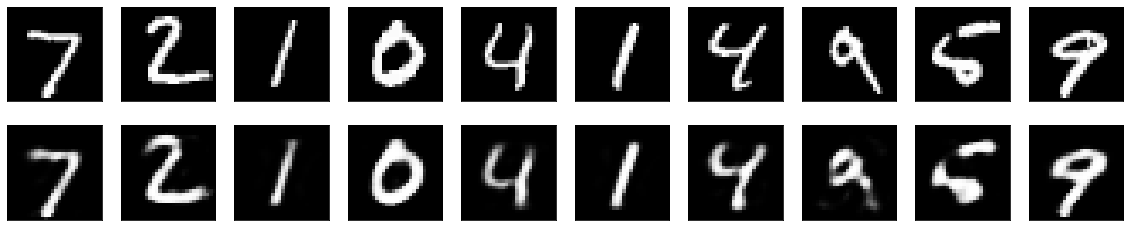

In [46]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()